# **GRIP The Sparks Foundation : TASK 2**

Applying Regression Models to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.


# Importing the Libraries

In [741]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing and Preparing the dataset

In [742]:
dataset = pd.read_csv('http://bit.ly/w-data') 
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
dataset

,Hours,Scores
0,2.50,21
1,5.10,47
2,3.20,27
3,8.50,75
4,3.50,30
5,1.50,20
6,9.20,88
7,5.50,60
8,8.30,81
9,2.70,25


In [743]:
dataset.shape

(25, 2)

In [744]:
dataset.head()

,Hours,Scores
0,2.50,21
1,5.10,47
2,3.20,27
3,8.50,75
4,3.50,30


In [745]:
dataset.describe()

,Hours,Scores
count,25.00,25.00
mean,5.01,51.48
std,2.53,25.29
min,1.10,17.00
25%,2.70,30.00
50%,4.80,47.00
75%,7.40,75.00
max,9.20,95.00


In [746]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [747]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [748]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Visualising the Dataset

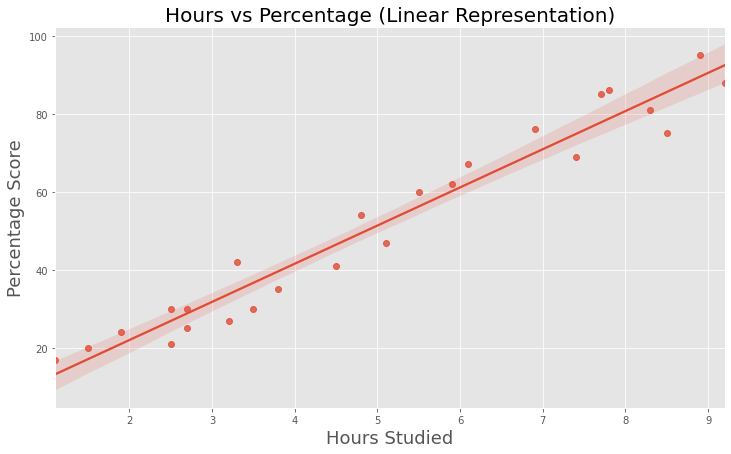

In [749]:
plt.figure(figsize=(12,7))
plt.style.use('ggplot')
sns.regplot(X,y)
plt.title('Hours vs Percentage (Linear Representation)',fontdict={'fontsize':20})  
plt.xlabel('Hours Studied',fontdict={'fontsize':18})  
plt.ylabel('Percentage Score',fontdict={'fontsize':18})
plt.show()

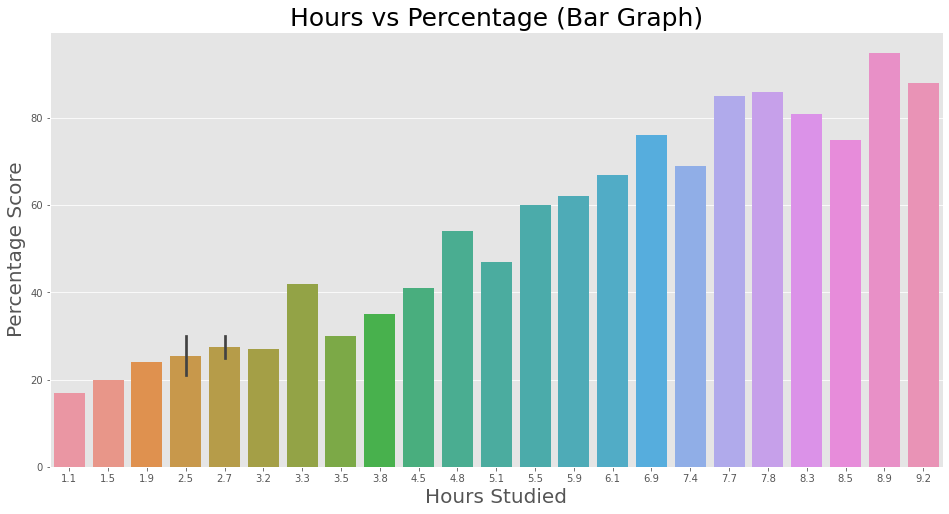

In [750]:
plt.figure(figsize=(16,8))
plt.style.use('ggplot')
sns.barplot(x=dataset['Hours'],y=dataset['Scores'])
plt.title('Hours vs Percentage (Bar Graph)',fontdict={'fontsize':25})  
plt.xlabel('Hours Studied',fontdict={'fontsize':20})  
plt.ylabel('Percentage Score',fontdict={'fontsize':20})
plt.show()

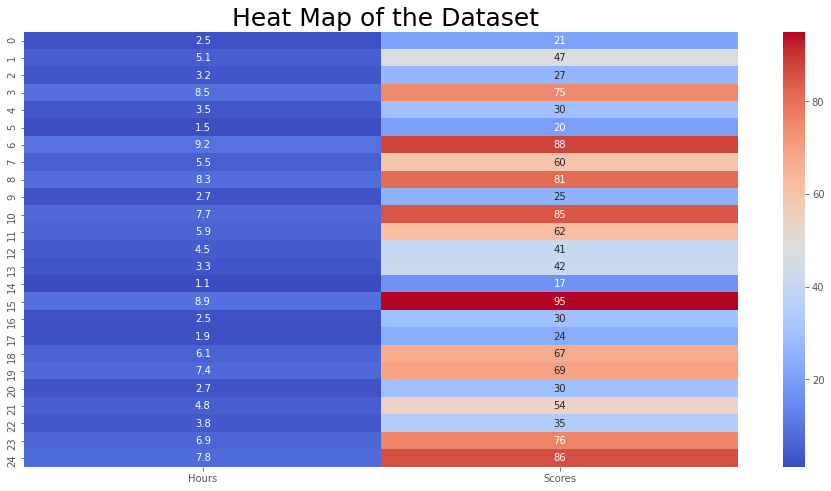

In [751]:
plt.figure(figsize=(16,8))
sns.heatmap(dataset, annot=True, cmap='coolwarm')
plt.title(' Heat Map of the Dataset',fontdict={'fontsize':25})
plt.show()


# Splitting the Dataset into Training set and Test Set

In [752]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 96)

#1. Implementing Simple Linear Regression

# Training the Simple Linear Regression Model on the Given Dataset

In [753]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test Set results

In [754]:
y_pred = lin_reg.predict(X_test)
print(y_pred)

[56.10940296 83.66461629 26.5859601  26.5859601  20.68127153 60.045862  ]


# Comparing the Actual and Predicted Values

In [755]:
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
0,60,56.11
1,81,83.66
2,21,26.59
3,30,26.59
4,24,20.68
5,62,60.05


# Checking the Accuracy Rate of the Model

In [756]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lin_reg, X = X_train, y = y_train, cv = 3)
print("Accuracy: {} %".format(accuracies.mean()*100))
print("Standard Deviation: {} %".format(accuracies.std()*100))

Accuracy: 93.26082505190722 %
Standard Deviation: 2.6503593797324863 %


#Checking the Mean Absolute Error and Root Mean Squared Error

In [757]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Mean Absolute error in Linear Regression Model:  ',mae)
print('Root Mean Squared Error in Linear Regression Model:  ',rmse)

Mean Absolute error in Linear Regression Model:   3.471346632602503
Root Mean Squared Error in Linear Regression Model:   3.649843785623521


# Visualising the Training Set Data in Linear Regression

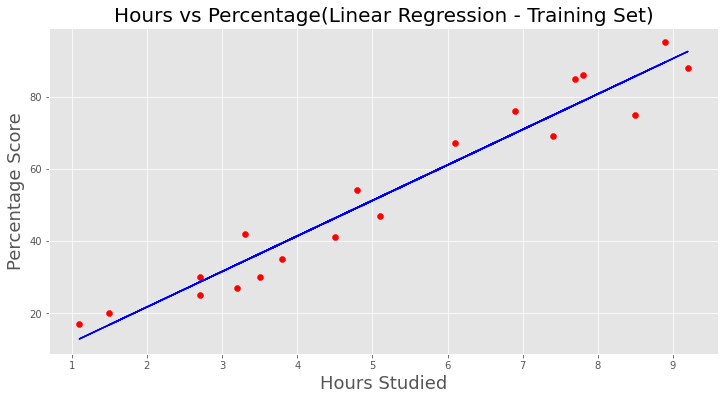

In [758]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage(Linear Regression - Training Set)',fontdict={'fontsize':20})  
plt.xlabel('Hours Studied',fontdict={'fontsize':18})  
plt.ylabel('Percentage Score',fontdict={'fontsize':18})
plt.show()

# Visualising the Test Set Data in Linear Regression 

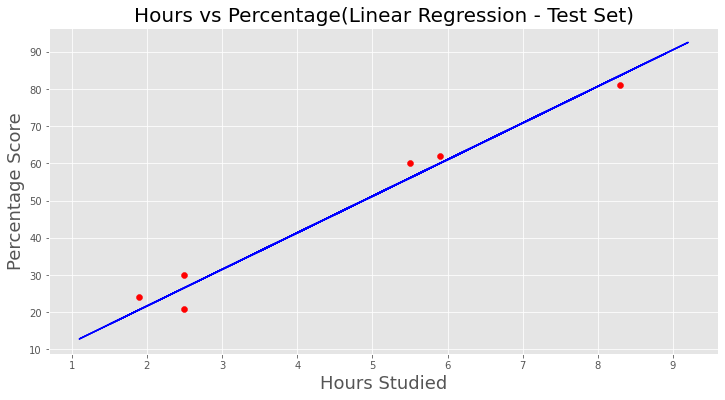

In [759]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage(Linear Regression - Test Set)',fontdict={'fontsize':20})  
plt.xlabel('Hours Studied',fontdict={'fontsize':18})  
plt.ylabel('Percentage Score',fontdict={'fontsize':18})
plt.show()

# Predicting the best model with the least RMSE value

In [760]:
!pip install lazypredict

In [761]:
from lazypredict.Supervised import LazyRegressor as LR
lazy_pred = LR()
regressor, predictions = lazy_pred.fit(X_train, X_test, y_train, y_test)

100%|██████████| 39/39 [00:00<00:00, 46.60it/s]

[11:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [762]:
regressor

,R-Squared,RMSE,Time Taken
Model,,,
ExtraTreesRegressor,0.98,3.49,0.08
ElasticNetCV,0.97,3.58,0.05
Lasso,0.97,3.58,0.01
Ridge,0.97,3.60,0.01
RidgeCV,0.97,3.63,0.01
BayesianRidge,0.97,3.64,0.01
LassoCV,0.97,3.65,0.06
LarsCV,0.97,3.65,0.01
TransformedTargetRegressor,0.97,3.65,0.01


#ExtraTreesRegression and ElasticNetCV  have the least RMSE value

#2. Implementing ExtraTreesRegressor Model

#Training the ExtraTreesRegressor Model

In [763]:
from sklearn.ensemble import ExtraTreesRegressor
etreg = ExtraTreesRegressor(n_estimators=100, random_state=0, n_jobs = -1)
etreg.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

#Predicting the Test Set Results on ExtraTreesRegressor

In [764]:
y_pred2=etreg.predict(X_test)
print(y_pred2)

[55.2  78.74 25.85 25.85 22.7  63.2 ]


#Comparing the Actual and Predicted Values

In [765]:
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})  
dataframe

,Actual,Predicted
0,60,55.20
1,81,78.74
2,21,25.85
3,30,25.85
4,24,22.70
5,62,63.20


#Checking the Accuracy of ExtraTreesRegressor Model

In [766]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = etreg, X = X_train, y = y_train, cv = 3)
print("Accuracy: {} %".format(accuracies.mean()*100))
print("Standard Deviation: {} %".format(accuracies.std()*100))

Accuracy: 89.21664399894604 %
Standard Deviation: 4.866866335525518 %


#Checking the Mean Absolute Error and Root Mean Squared Error

In [767]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_pred2)
rmse=np.sqrt(mean_squared_error(y_test,y_pred2))
print('Mean Absolute error in Linear Regression Model:  ',mae)
print('Root Mean Squared Error in Linear Regression Model:  ',rmse)

Mean Absolute error in Linear Regression Model:   3.093333333333334
Root Mean Squared Error in Linear Regression Model:   3.464645243984825


# Visualising the Training Set Data on ExtraTreesRegressor

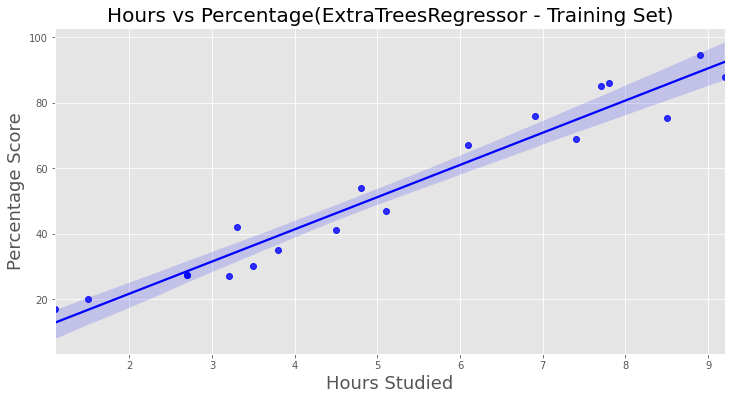

In [768]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.regplot(X_train, etreg.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage(ExtraTreesRegressor - Training Set)',fontdict={'fontsize':20})  
plt.xlabel('Hours Studied',fontdict={'fontsize':18})  
plt.ylabel('Percentage Score',fontdict={'fontsize':18})
plt.show()

# Visualising the Test Set Data on ExtraTreesRegressor

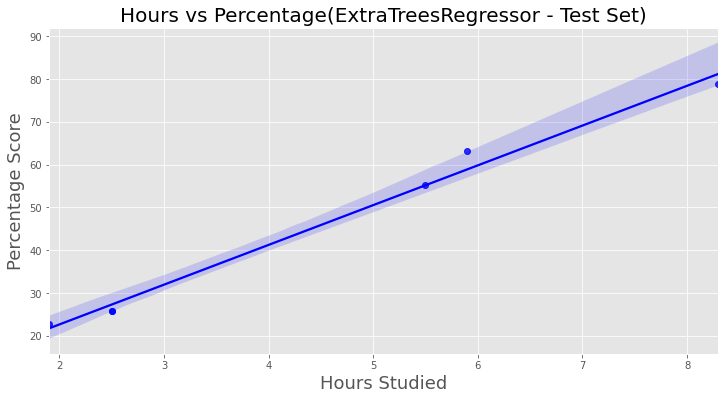

In [769]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.regplot(X_test, etreg.predict(X_test), color = 'blue')
plt.title('Hours vs Percentage(ExtraTreesRegressor - Test Set)',fontdict={'fontsize':20})  
plt.xlabel('Hours Studied',fontdict={'fontsize':18})  
plt.ylabel('Percentage Score',fontdict={'fontsize':18})
plt.show()

#3. Implementing ElasticNetCV Model

#Training the ElasticNetCV Model

In [770]:
from sklearn.linear_model import ElasticNetCV
ENReg = ElasticNetCV(cv=3, random_state=96, n_jobs = -1)
ENReg.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=-1,
             normalize=False, positive=False, precompute='auto',
             random_state=96, selection='cyclic', tol=0.0001, verbose=0)

#Predicting the Test Set results on ElasticNetCV

In [771]:
y_pred3=ENReg.predict(X_test)
print(y_pred3)

[56.07715202 83.33654641 26.87065803 26.87065803 21.02935923 59.97135122]


#Comparing the Actual and Predicted Values

In [772]:
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})  
dataframe

,Actual,Predicted
0,60,56.08
1,81,83.34
2,21,26.87
3,30,26.87
4,24,21.03
5,62,59.97


#Checking the Accuracy of ElasticNetCV Model

In [773]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ENReg, X = X_train, y = y_train, cv = 3)
print("Accuracy: {} %".format(accuracies.mean()*100))
print("Standard Deviation: {} %".format(accuracies.std()*100))

Accuracy: 93.52005168967875 %
Standard Deviation: 2.09724214327077 %


#Checking the Mean Absolute Error and Root Mean Squared Error

In [774]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_pred3)
rmse=np.sqrt(mean_squared_error(y_test,y_pred3))
print('Mean Absolute error in Linear Regression Model:  ',mae)
print('Root Mean Squared Error in Linear Regression Model:  ',rmse)

Mean Absolute error in Linear Regression Model:   3.3764473243168767
Root Mean Squared Error in Linear Regression Model:   3.6066077029901793


# Visualising the Training Set Data on ElasticNetCV

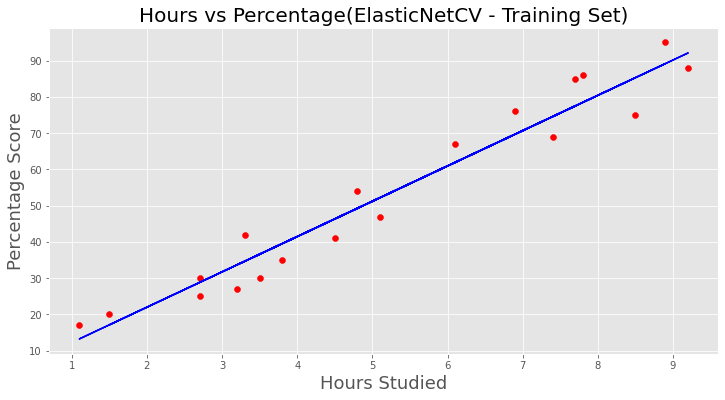

In [775]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, ENReg.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage(ElasticNetCV - Training Set)',fontdict={'fontsize':20})  
plt.xlabel('Hours Studied',fontdict={'fontsize':18})  
plt.ylabel('Percentage Score',fontdict={'fontsize':18})
plt.show()

# Visualising the Test Set Data on ElasticNetCV

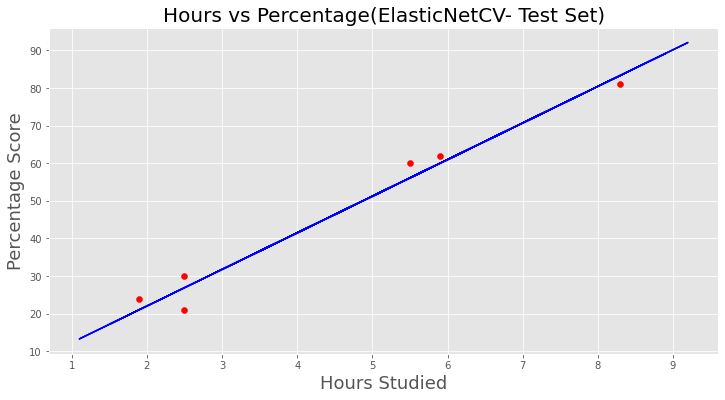

In [776]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, ENReg.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage(ElasticNetCV- Test Set)',fontdict={'fontsize':20})  
plt.xlabel('Hours Studied',fontdict={'fontsize':18})  
plt.ylabel('Percentage Score',fontdict={'fontsize':18})
plt.show()

#Testing user data on the above three Model

In [777]:
h = float(input(' Enter number of hours studied : '))
pred1 = lin_reg.predict([[h]])
pred2 = etreg.predict([[h]])
pred3 = ENReg.predict([[h]])
print("Number of Hours Studied = {}".format(h))
print("Predicted Score by Linear Regression Model = {}%".format(pred1))
print("Predicted Score by ExtraTreesRegressor Model = {}%".format(pred2))
print("Predicted Score ElasticNetCV Model = {}%".format(pred3))

 Enter number of hours studied : 9.25
Number of Hours Studied = 9.25
Predicted Score by Linear Regression Model = [93.01370653]%
Predicted Score by ExtraTreesRegressor Model = [87.92]%
Predicted Score ElasticNetCV Model = [92.58526951]%


#*** END ***